## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [233]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [234]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt

In [235]:
# read the data
data = pd.read_csv('ExtraaLearn.csv')

In [236]:
df = data.copy()

In [237]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [238]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [239]:
df.shape

(4612, 15)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [241]:
df.duplicated().value_counts()

False    4612
Name: count, dtype: int64

In [242]:
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [243]:
cat_cols = list(df.select_dtypes("object").columns)

for col_name in cat_cols:
    col =  df[col_name]
    print(col.value_counts())
    print(round(100* col.value_counts() / len(col), 2))
    print( '=' * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
ID
EXT001     0.02
EXT2884    0.02
EXT3080    0.02
EXT3079    0.02
EXT3078    0.02
           ... 
EXT1537    0.02
EXT1536    0.02
EXT1535    0.02
EXT1534    0.02
EXT4612    0.02
Name: count, Length: 4612, dtype: float64
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
current_occupation
Professional    56.72
Unemployed      31.24
Student         12.03
Name: count, dtype: float64
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
first_interaction
Website       55.12
Mobile App    44.88
Name: count, dtype: float64
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
profile_completed
High      49.09
Medium    48.59
Low        2.32
Name: count, dtype: float64
last_activity
Email A

In [244]:
# Checking the number of unique values
print(df["ID"].nunique())


4612


In [245]:
df.drop('ID', axis= 1, inplace=True)

In [246]:
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


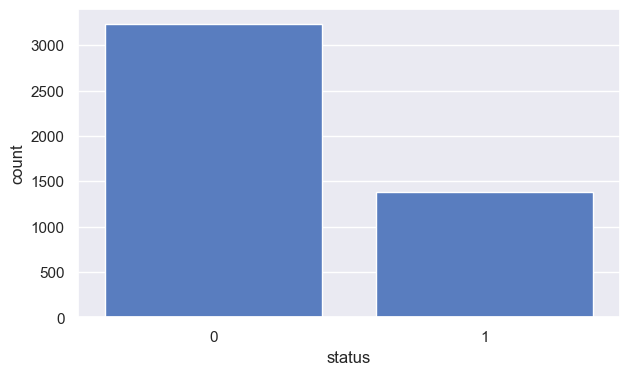

In [247]:
fig = plt.figure(figsize = (7,4))

plots = sns.countplot(data = df, x = 'status')

In [248]:
numeric_cols

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')

========== age ==========
асимметрия skew : -0.72


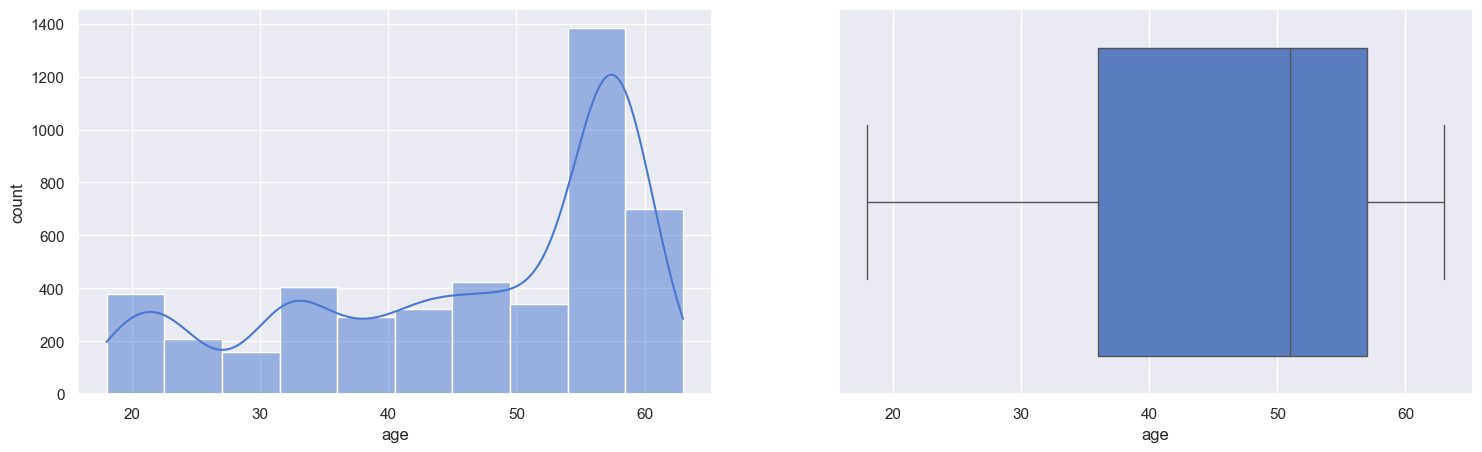

========== website_visits ==========
асимметрия skew : 2.16


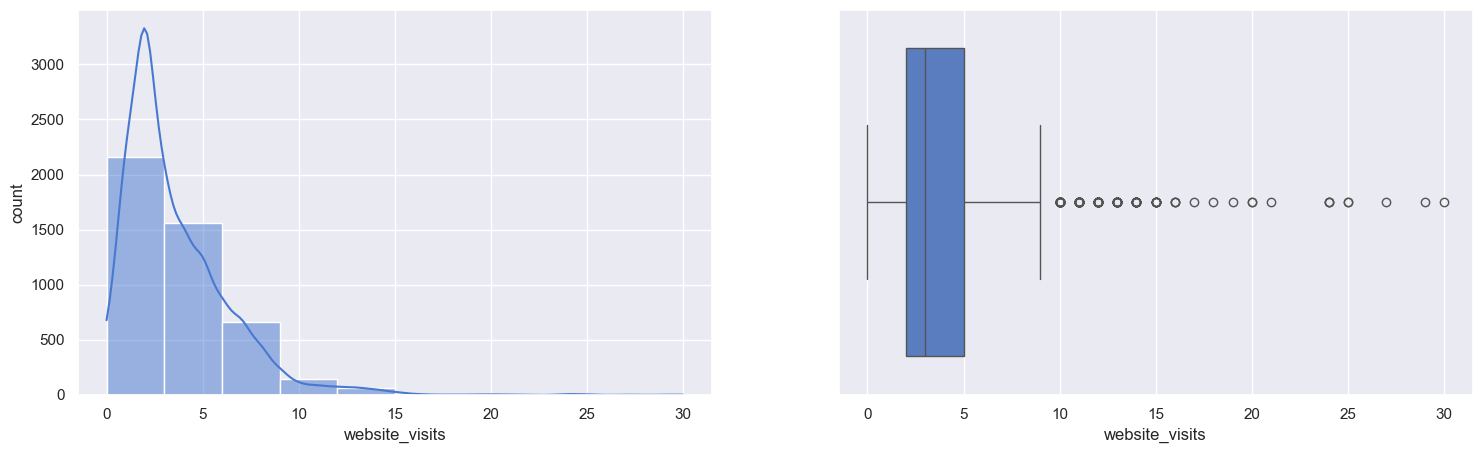

========== time_spent_on_website ==========
асимметрия skew : 0.95


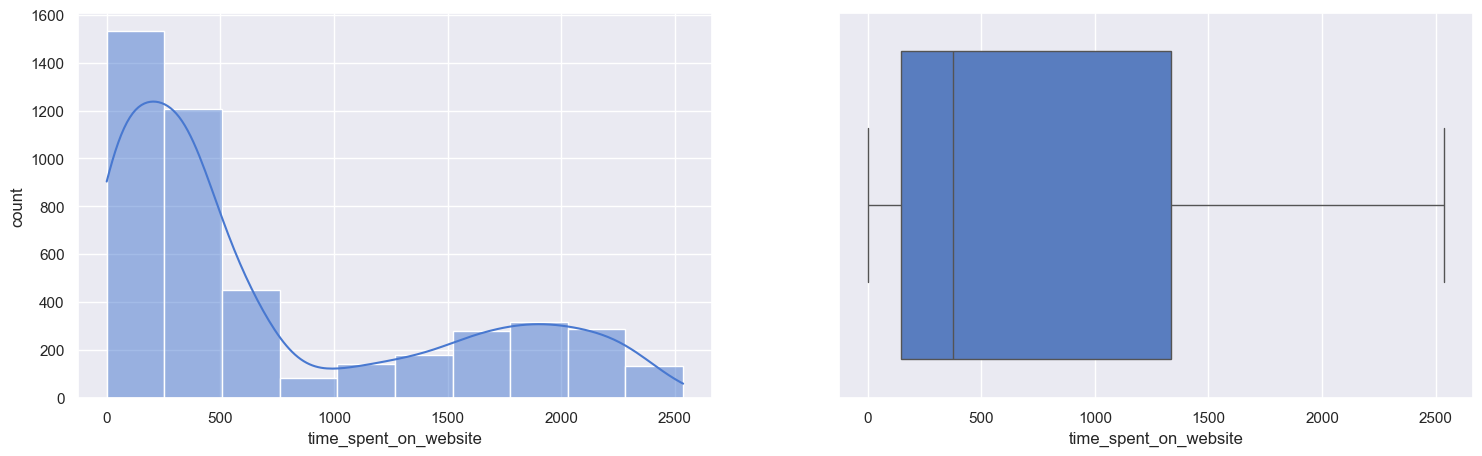

========== page_views_per_visit ==========
асимметрия skew : 1.27


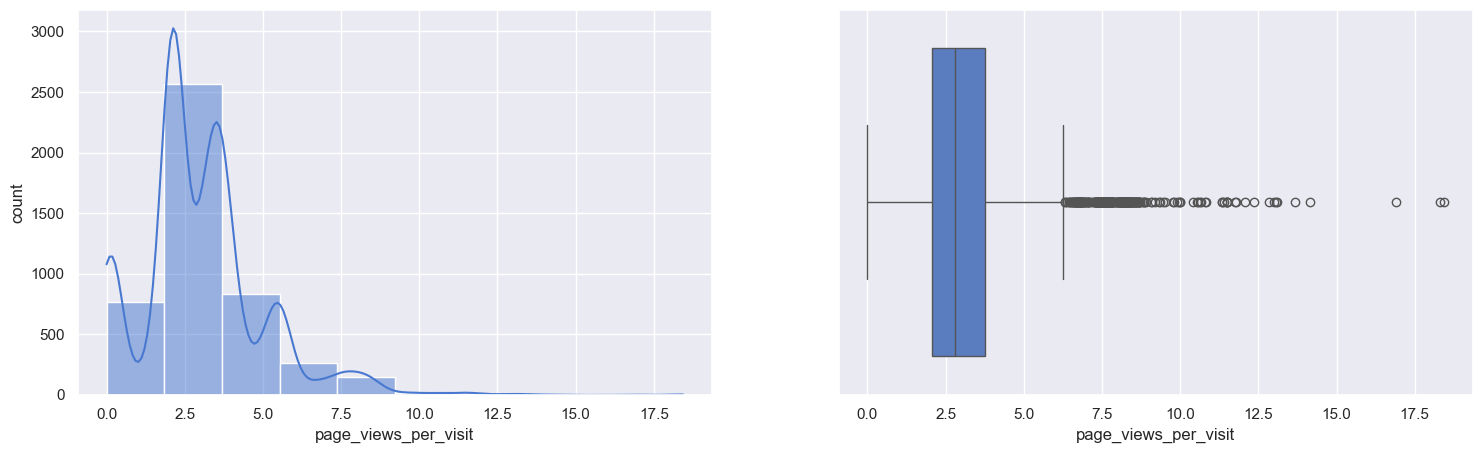

In [249]:
#sns.set_theme(palette= 'muted')
for feature in ['age', 'website_visits', 'time_spent_on_website','page_views_per_visit']:
    fig, axes = plt.subplots(1, 2, figsize = (18,5))
    cur_col = df[feature]
    
    print('='* 10, feature, '=' * 10)
    print('асимметрия skew :',round(cur_col.skew(), 2))
    

    sns.histplot( x = cur_col, ax =  axes[0], bins = 10, kde=True)
    #sns.histplot(x = cur_col, ax = axes[1])
    axes[0].set_ylabel('count')
    
    sns.boxplot(x = cur_col, ax = axes[1])

    
    plt.show()

current_occupation


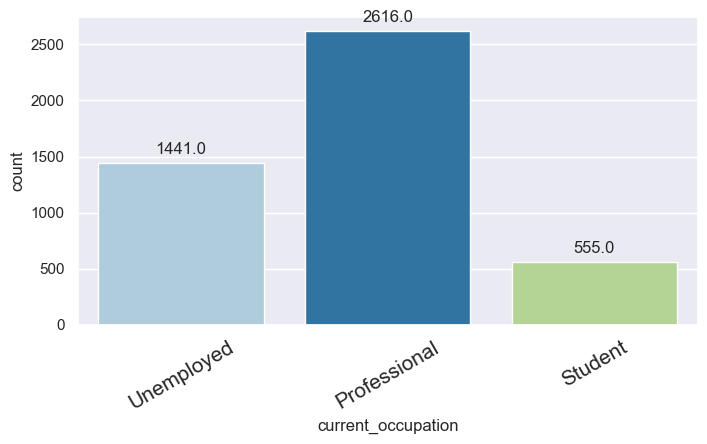

first_interaction


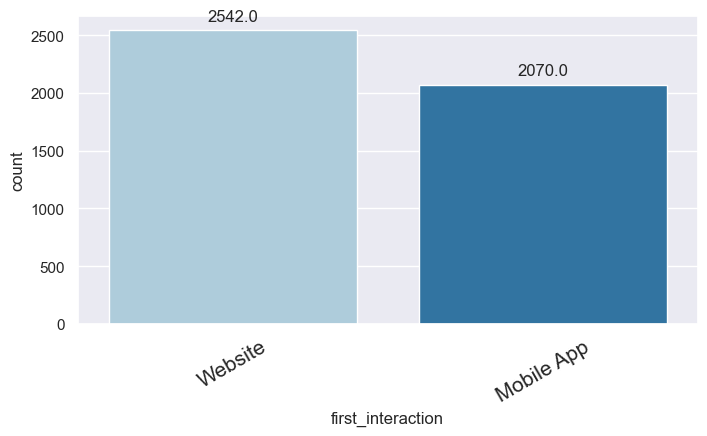

profile_completed


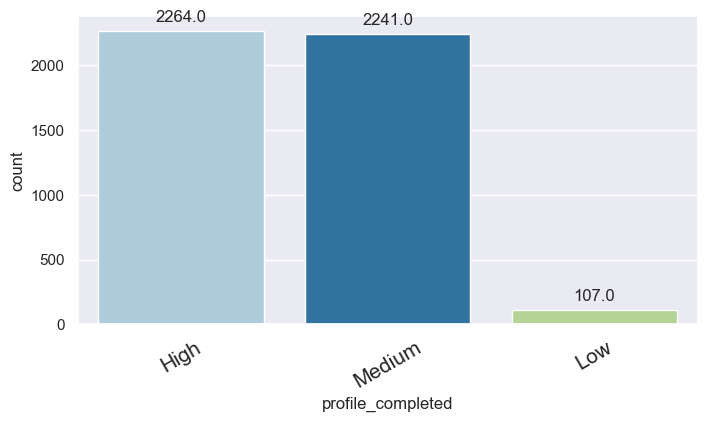

last_activity


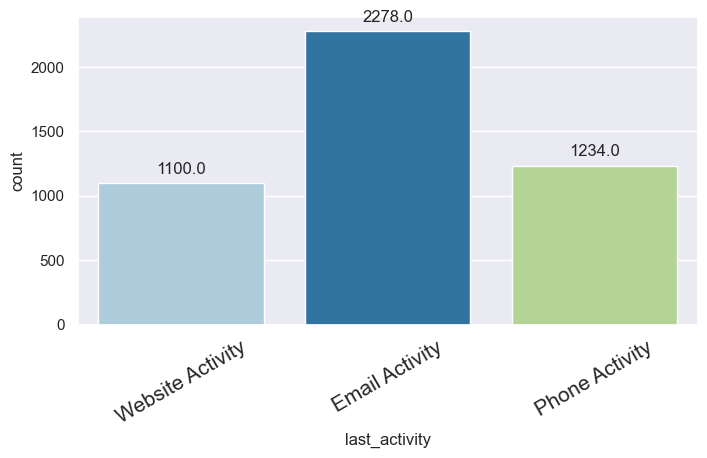

print_media_type1


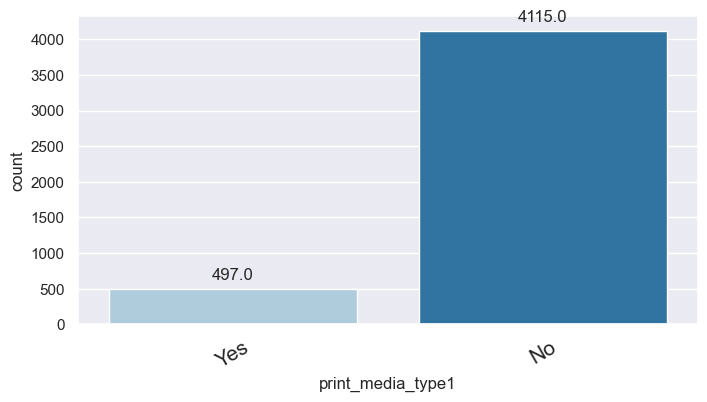

print_media_type2


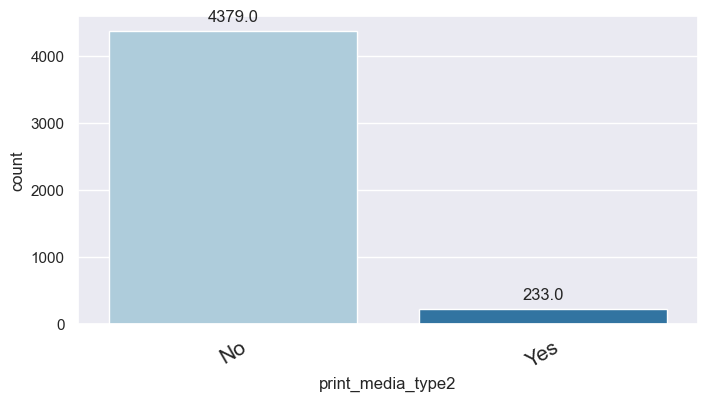

digital_media


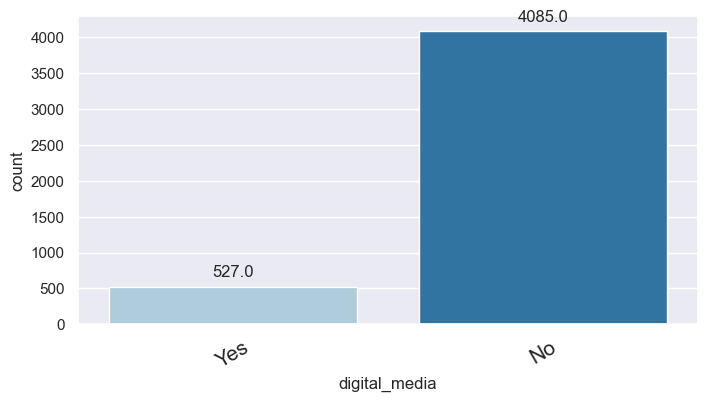

educational_channels


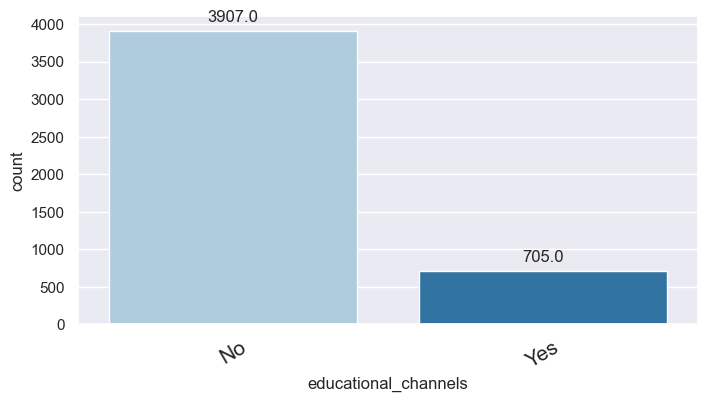

referral


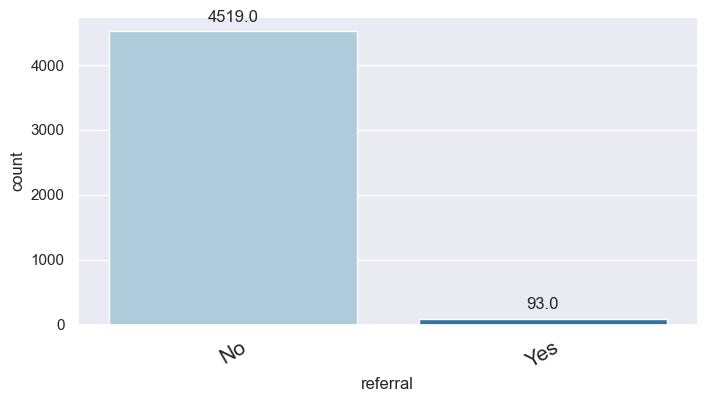

In [250]:
cat_cols = list(df.select_dtypes("object").columns)
for feature in cat_cols:
    print(feature)
    
    
    plt.figure(figsize=(8,4))
    cur_col = df[feature]
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data = df, x = cur_col, palette='Paired')
    #ax.set_xticklabels(('a','b','c'))
    x_list = [(i.get_x() + i.get_width()/2) for i in ax.patches]
    y_list = [i.get_height() for i in ax.patches]

    for i in zip(x_list, y_list):
        ax.annotate(
            i[1],
            i,
            ha="center",
            va="center",
            size=12,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage
    plt.xticks(rotation=30)
    plt.show()
    

In [251]:
numeric_cols

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status'],
      dtype='object')

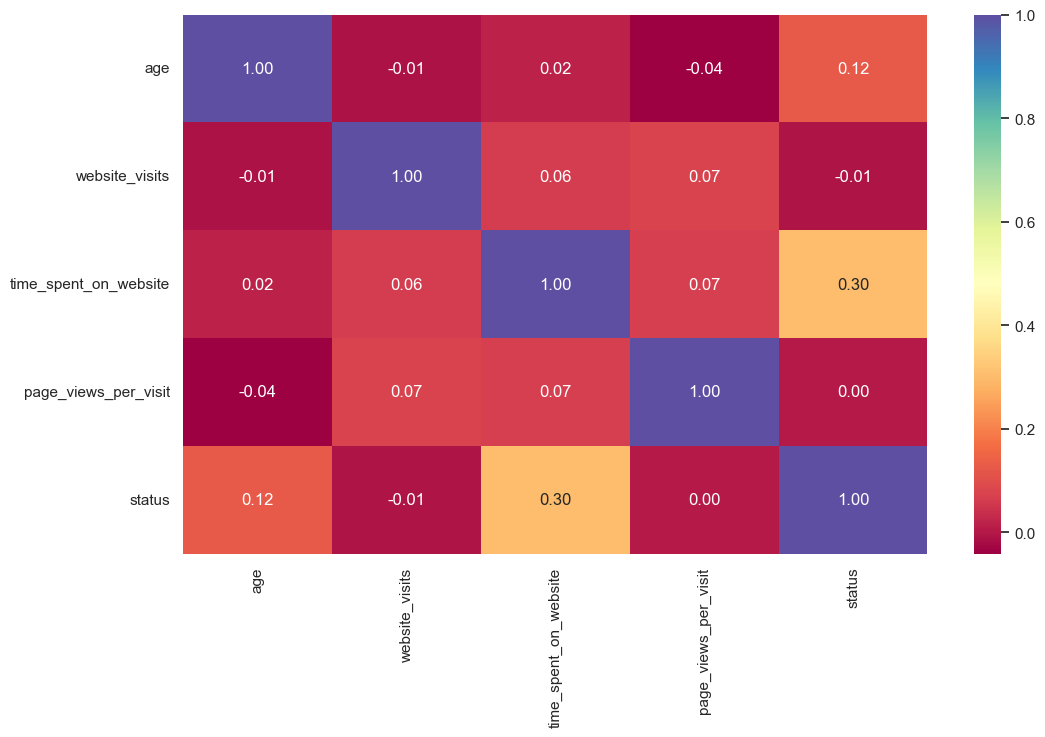

In [252]:
fig = plt.figure(figsize= (12, 7))

sns.heatmap(df[numeric_cols].corr(), annot = True, fmt = '.2f', cmap="Spectral")


fig.align_ylabels()
plt.show()


In [253]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    
    sorter = data[target].unique()[-1]

    crosstab = pd.crosstab(data[predictor], data[target], margins= True).sort_values(by = sorter)
    print(crosstab)


    crosstab1 = pd.crosstab(data[predictor], data[target], normalize= 'index').sort_values(by = sorter)# normalize= 1)

    print("-" * 120)
    
    fig, ax = plt.subplots(figsize=(10, 5))

    crosstab1.plot(kind= 'bar', stacked= True, ax = ax)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title = 'status')
    plt.xticks(rotation=0)
    plt.show()
        

status               0     1   All
last_activity                     
Website Activity   677   423  1100
Phone Activity     971   263  1234
Email Activity    1587   691  2278
All               3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


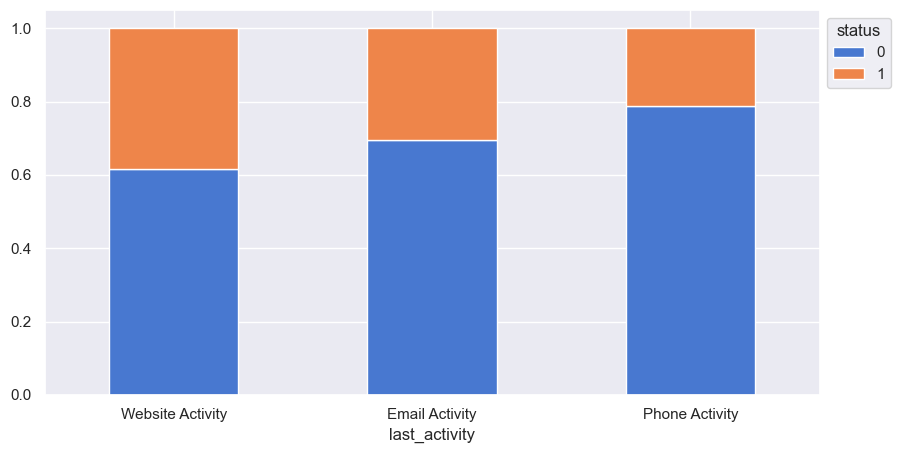

In [254]:
stacked_barplot(df, 'last_activity','status')

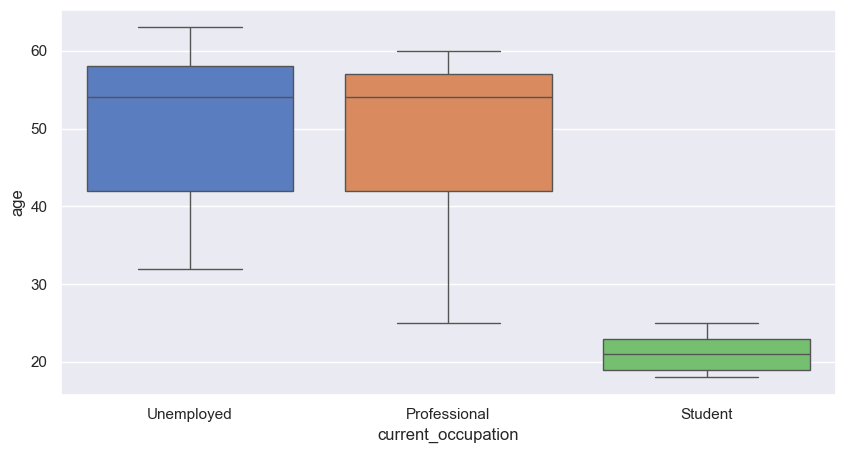

In [255]:

plt.figure(figsize=(10, 5))

sns.boxplot(x="current_occupation", y="age", data=df, palette="muted")
plt.show()


In [256]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


status                 0     1   All
current_occupation                  
Student              490    65   555
Unemployed          1058   383  1441
Professional        1687   929  2616
All                 3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


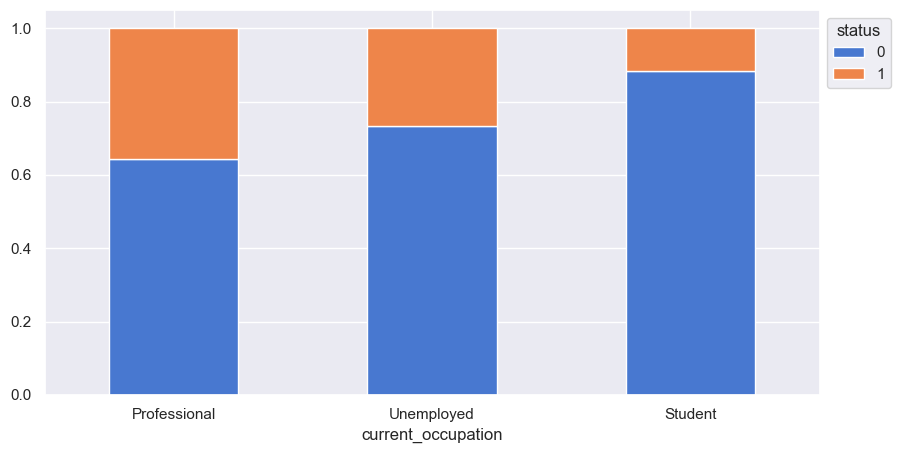

status                0     1   All
first_interaction                  
Website            1383  1159  2542
Mobile App         1852   218  2070
All                3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


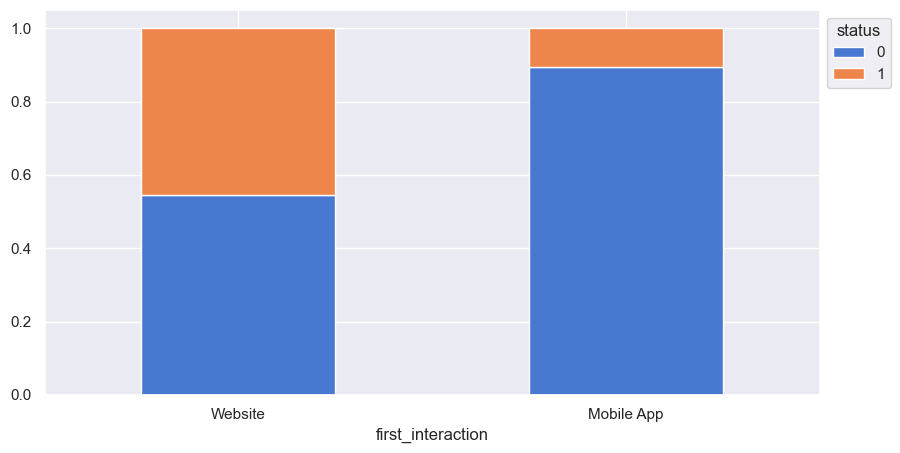

status                0     1   All
profile_completed                  
Low                  99     8   107
High               1318   946  2264
Medium             1818   423  2241
All                3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


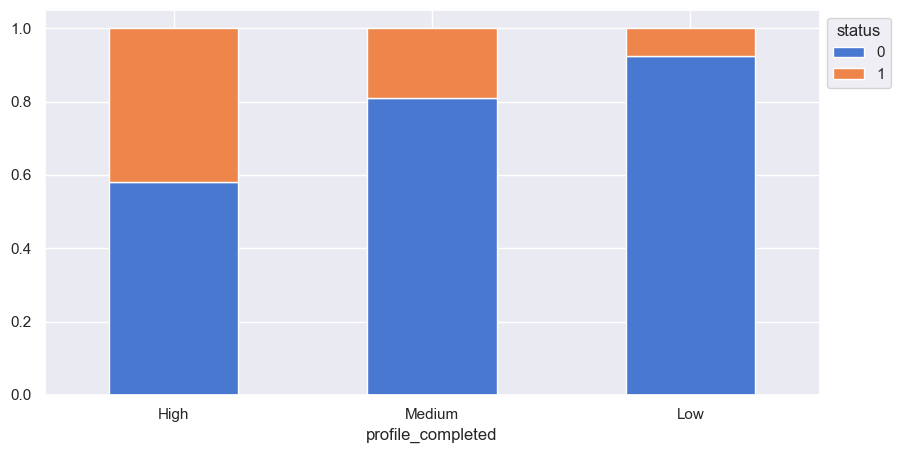

status               0     1   All
last_activity                     
Website Activity   677   423  1100
Phone Activity     971   263  1234
Email Activity    1587   691  2278
All               3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


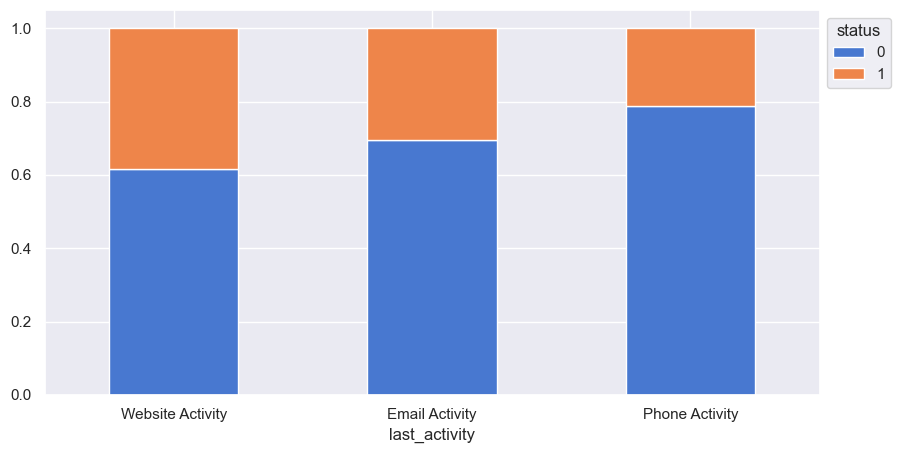

status                0     1   All
print_media_type1                  
Yes                 338   159   497
No                 2897  1218  4115
All                3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


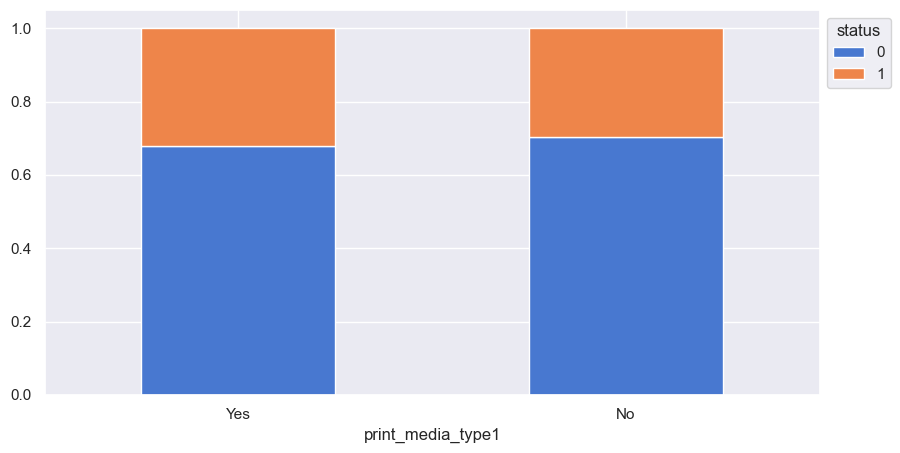

status                0     1   All
print_media_type2                  
Yes                 158    75   233
No                 3077  1302  4379
All                3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


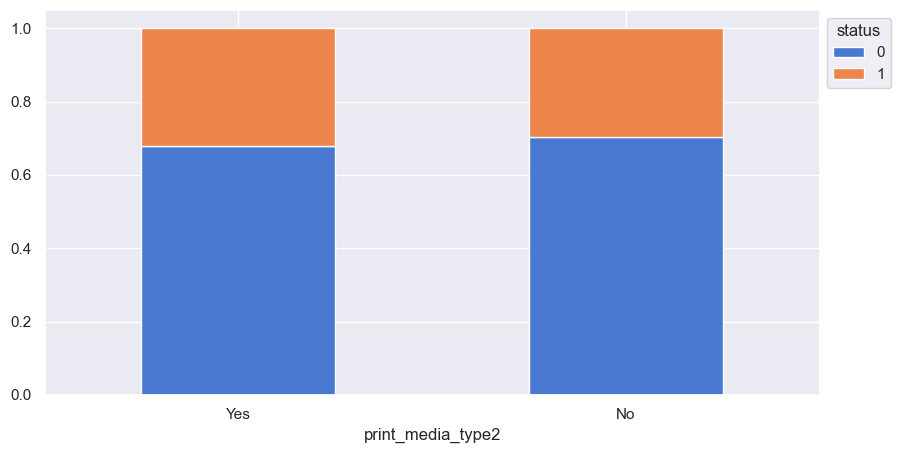

status            0     1   All
digital_media                  
Yes             359   168   527
No             2876  1209  4085
All            3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


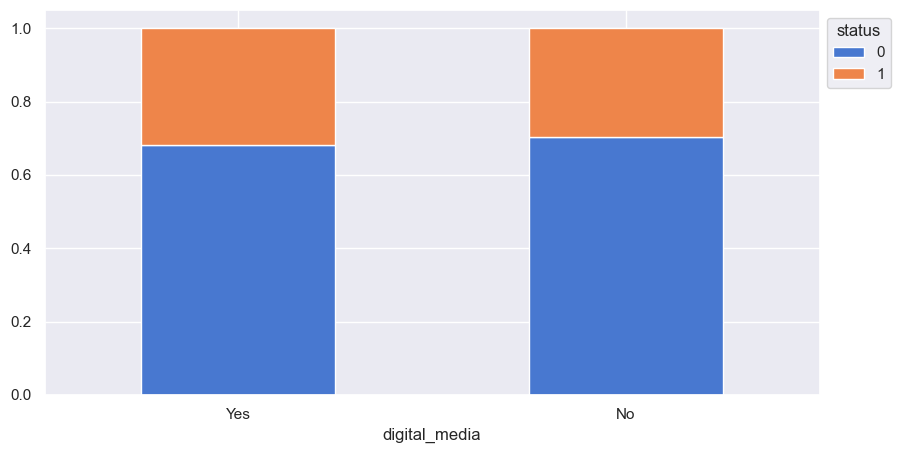

status                   0     1   All
educational_channels                  
Yes                    508   197   705
No                    2727  1180  3907
All                   3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


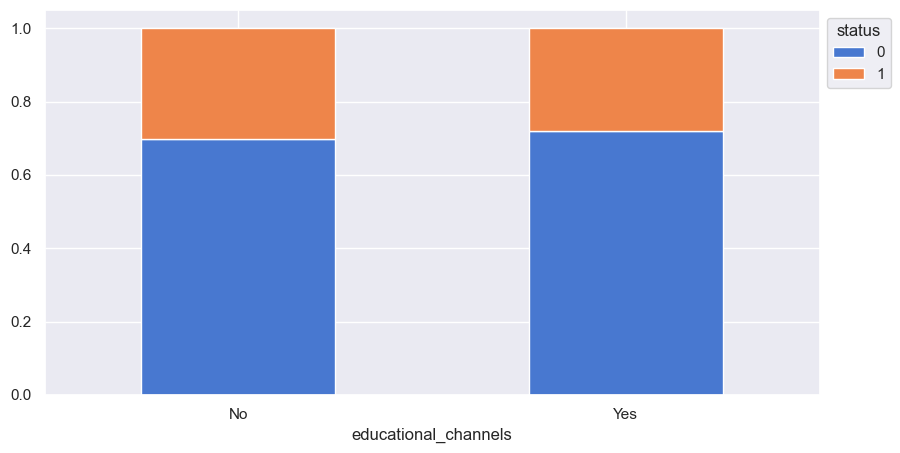

status       0     1   All
referral                  
Yes         30    63    93
No        3205  1314  4519
All       3235  1377  4612
------------------------------------------------------------------------------------------------------------------------


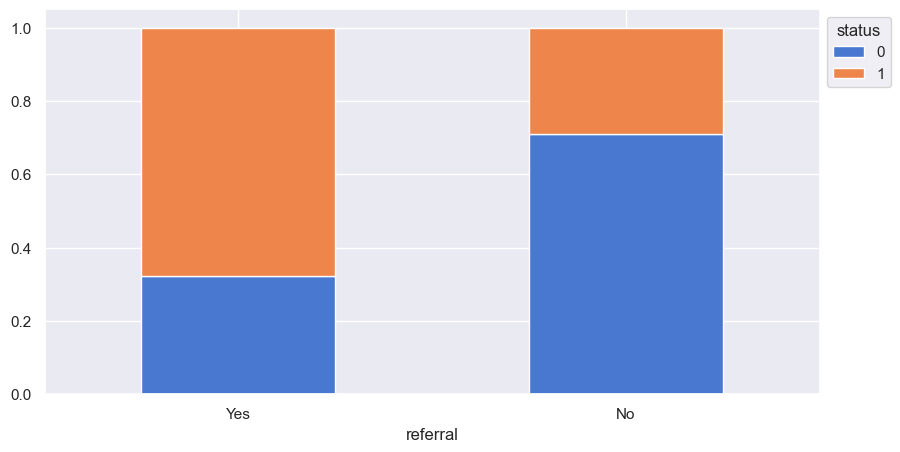

In [257]:
for cat_col_name in cat_cols:
    stacked_barplot(df, cat_col_name,'status')